# Amazon Customer Purchase Behavior Analysis

In this notebook, I will analyze customer purchasing behavior on Amazon.

I will explore and answer the following three key questions:

1. **What are the best-selling products?**
2. **When are purchases most frequently made?**
3. **What is the purchasing behavior by category?**

Data source: Kaggle ,
Analysis using: Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
Amazon = pd.read_csv("/Users/hayaalbuhaisi/Desktop/AIProf/Amazon Customer Behavior Survey.csv")
Amazon = Amazon.copy()
Amazon

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [4]:
Amazon.shape

(602, 23)

In [11]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   602 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [13]:
Amazon.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
Amazon.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [17]:
Amazon.fillna({'Product_Search_Method': 'Unknown'}, inplace=True)

In [19]:
Amazon.duplicated().sum()

0

### What are the best-selling products?

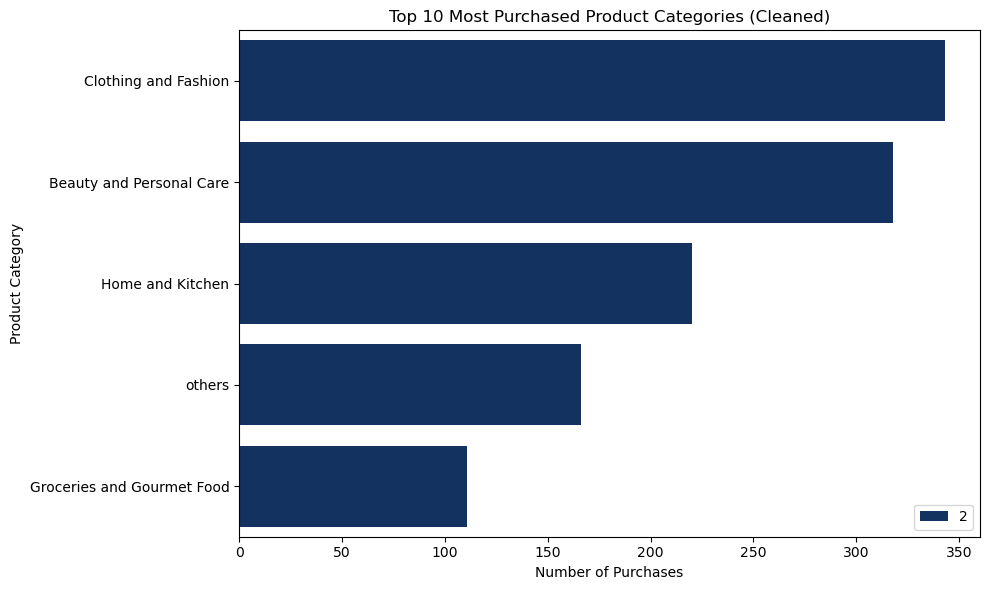

In [23]:
all_categories = Amazon['Purchase_Categories'].dropna().apply(lambda x: x.split(';'))
flat_categories = [cat.strip() for sublist in all_categories for cat in sublist]
category_counts = pd.Series(Counter(flat_categories)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.values, y=category_counts.index,hue=2,palette='Blues_r')
plt.title('Top 10 Most Purchased Product Categories (Cleaned)')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### 🔍 Insights: Top 10 Most Purchased Product Categories

The bar chart above shows the most frequently purchased product categories after cleaning and splitting combined values.

**Key observations:**

- **Clothing and Fashion** is the most purchased category among all users.
- It is followed closely by **Beauty and Personal Care**, which also has a high number of purchases.
- **Home and Kitchen** products take the third place in popularity.
- The category **"others"** appears frequently, which may indicate unspecified or less common items.
- **Groceries and Gourmet Food** is also among the top categories, indicating regular household needs.

This analysis helps us understand customer interests and the dominant product categories in their shopping behavior.

## When are purchases most frequently made?

In [40]:
Amazon['Timestamp'] = pd.to_datetime(Amazon['Timestamp'])

In [42]:
Amazon['DayOfWeek'] = Amazon['Timestamp'].dt.day_name()

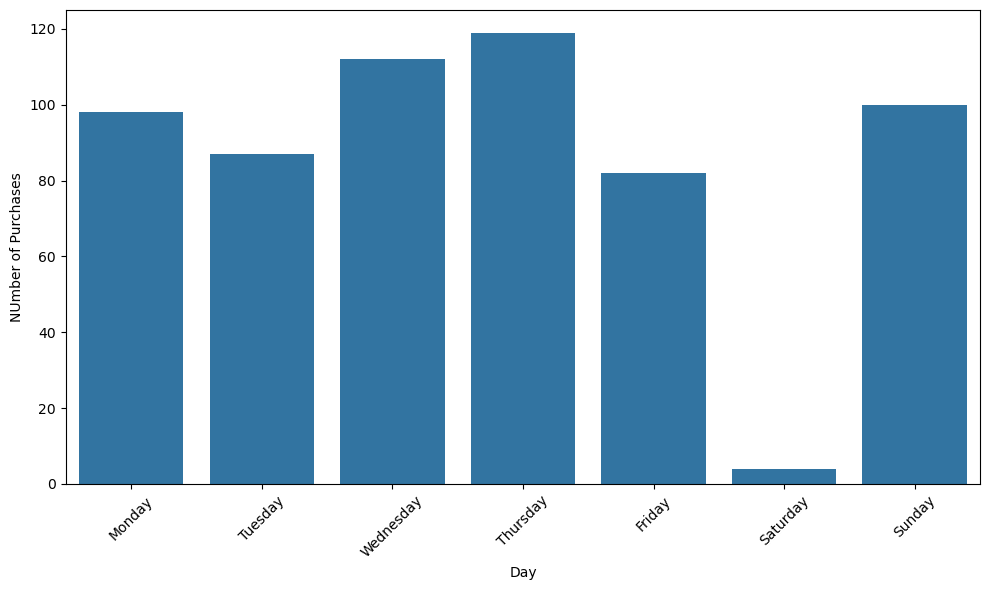

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=Amazon,x='DayOfWeek' , order=['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                 'Saturday','Sunday'])
plt.xlabel('Day')
plt.ylabel('NUmber of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🕒 Insights: When Are Purchases Most Frequently Made?

The bar chart above shows the distribution of purchases across the days of the week based on the `Timestamp` data.

**Key observations:**

- **Thursday** has the highest number of purchases, indicating strong activity towards the end of the workweek.
- **Wednesday** and **Sunday** also show significant purchasing activity.
- **Saturday** has the lowest purchase activity, which may suggest that users are less likely to shop online during the weekend, possibly due to offline activities.
- The overall pattern shows that mid-week and end-of-week are peak times for customer purchases.

These insights can help in planning marketing campaigns or special offers to align with peak shopping days.

## What is the purchasing behavior by category?
Analysis by category and Gender

In [53]:
Amazon['Categories_List'] = Amazon['Purchase_Categories'].str.split(';')
df_exploded = Amazon.explode('Categories_List')

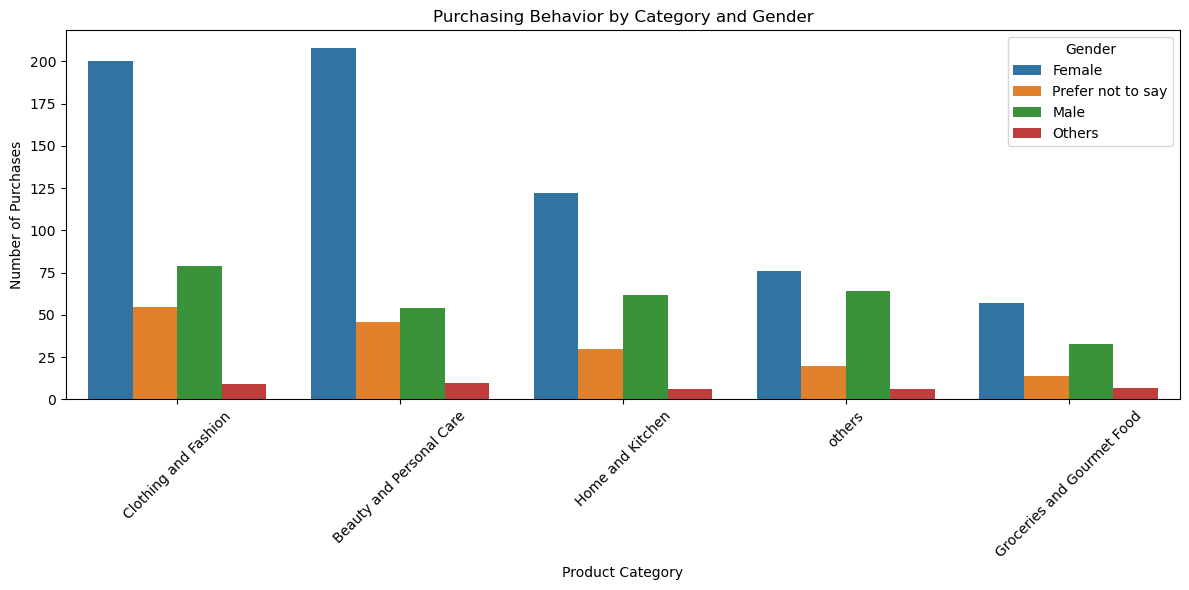

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_exploded, x='Categories_List' , hue='Gender' , order=df_exploded['Categories_List'].value_counts().index)
plt.title('Purchasing Behavior by Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🛍️ Insights: What is the Purchasing Behavior by Category?

The chart above displays how purchase behavior varies by product category and gender.

**Key observations:**

- **Female users** dominate the purchases in most categories, particularly in:
  - **Clothing and Fashion**
  - **Beauty and Personal Care**
- **Male users** tend to purchase more from the **"Others"** and **Home and Kitchen** categories compared to other groups.
- A smaller but visible number of purchases come from users who selected **"Prefer not to say"** or **"Others"** as their gender.
- Across all groups, **Clothing and Fashion** is a leading category, showing its universal appeal.

This analysis helps highlight user preferences across product categories, which is valuable for targeted marketing and personalized recommendations.